In [1]:
import os
from itertools import repeat
from concurrent.futures import ThreadPoolExecutor
from geotile import GeoTile
import geopandas as gpd
import rasterio
from shapely.geometry import Polygon
import shapely

In [2]:
!ls images/overlap

J-29-C-2-O-9.jpg	  J-29-C-5-M-2.jpg	    J-29-C-5-N-4.jpg
J-29-C-2-O-9.jpg.aux.xml  J-29-C-5-M-2.jpg.aux.xml  J-29-C-5-N-4.jpg.aux.xml
J-29-C-2-P-4.jpg	  J-29-C-5-M-3.jpg	    J-29-C-5-N-5.jpg
J-29-C-2-P-4.jpg.aux.xml  J-29-C-5-M-3.jpg.aux.xml  J-29-C-5-N-5.jpg.aux.xml
J-29-C-2-P-5.jpg	  J-29-C-5-M-4.jpg	    J-29-C-5-N-6.jpg
J-29-C-2-P-5.jpg.aux.xml  J-29-C-5-M-4.jpg.aux.xml  J-29-C-5-N-6.jpg.aux.xml
J-29-C-2-P-6.jpg	  J-29-C-5-M-5.jpg	    J-29-C-5-N-7.jpg
J-29-C-2-P-6.jpg.aux.xml  J-29-C-5-M-5.jpg.aux.xml  J-29-C-5-N-7.jpg.aux.xml
J-29-C-2-P-7.jpg	  J-29-C-5-M-6.jpg	    J-29-C-5-N-8.jpg
J-29-C-2-P-7.jpg.aux.xml  J-29-C-5-M-6.jpg.aux.xml  J-29-C-5-N-8.jpg.aux.xml
J-29-C-2-P-8.jpg	  J-29-C-5-M-7.jpg	    J-29-C-5-O-1.jpg
J-29-C-2-P-8.jpg.aux.xml  J-29-C-5-M-7.jpg.aux.xml  J-29-C-5-O-1.jpg.aux.xml
J-29-C-2-P-9.jpg	  J-29-C-5-M-8.jpg	    J-29-C-5-O-2.jpg
J-29-C-2-P-9.jpg.aux.xml  J-29-C-5-M-8.jpg.aux.xml  J-29-C-5-O-2.jpg.aux.xml
J-29-C-3-O-7.jpg	  J-29-C-5-M-9.jpg	    J-29-C-5-O-3.jpg
J-29-

In [3]:
def tile_image(input_image, output_path):
        gt = GeoTile(input_image)
        image_name = os.path.basename(input_image)
        prefix = image_name.replace('.jpg', '_')
        gt.generate_tiles(
            output_path,
            tile_x=512,
            tile_y=512,
            stride_x=512,
            stride_y=512,
            prefix=prefix
        )


def tiles_from_path(input_path, output_path, debug: bool = False):
    input_images = [img for img in os.listdir(input_path) if img.endswith('.jpg')]
    
    if debug:
        input_images = input_images[:12]

    try:
        print(f'Processing {len(input_images)} images...')

        input_images_path = [os.path.join(input_path, img) for img in input_images]

        with ThreadPoolExecutor(max_workers=12) as executor:
            futures = list(executor.map(
                tile_image,
                input_images_path,
                repeat(output_path)
            ))
        print('Processing complete.')
        
    except Exception as e:
        print('Failed processing: ', e)

In [4]:
input_path = 'images/overlap'
output_path = 'images/overlap/tiles/'

tiles_from_path(input_path, output_path, False)

Processing 33 images...
Processing complete.


## Borra tiles fuera de AOI train

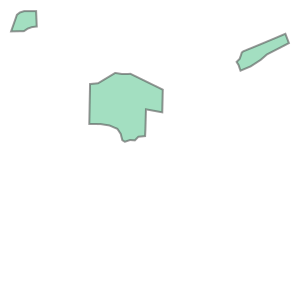

In [5]:
# borra tiles que no solapan con el área de entrenamiento
aoi_train = gpd.read_file("input_vector_data/aoi_train.geojson")

# Get list of geometries for all features in vector file
geom_list = [shapes for shapes in aoi_train.geometry]

aoi_geom = shapely.unary_union(geom_list)

aoi_geom

In [6]:
input_images = os.listdir('images/overlap/tiles')
input_images[:3]

['J-29-C-5-O-2_290.jpg',
 'J-29-C-2-O-9_197.jpg.aux.xml',
 'J-29-C-5-N-6_237.jpg.aux.xml']

In [7]:
counter = 0

for img in input_images:
    if img.endswith('.jpg'):
        img_path = os.path.join('images/overlap/tiles', img)
        raster = rasterio.open(img_path)
        coords = [raster.bounds[i] for i in range(4)]
        lon_point_list = [coords[0], coords[2], coords[2], coords[0]]
        lat_point_list = [coords[3], coords[3], coords[1], coords[1]]
        bbox = Polygon(zip(lon_point_list, lat_point_list))

        if not bbox.intersects(aoi_geom):
            print('No hay intersección entre AOI e imagen input.')
            os.remove(img_path)
            os.remove(os.path.join(img_path, '.aux.xml'))
        else:
            counter += 1
            print(f'Se conserva el tile {img}')

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_126.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_49.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_125.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-8_230.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_209.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

Se conserva el tile J-29-C-5-N-5_371.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-6_104.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_75.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_122.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_240.jpg
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_326.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_140.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_330.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_163.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_28.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen i

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_87.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen i

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

Se conserva el tile J-29-C-5-M-9_244.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_3

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-5_243.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_313.jp

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_248.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_305.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-P-1_38.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_165.jpg

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-6_32.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_274.jpg

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-8_210.jpg
Se conserva el tile J-29-C-5-M-9_289.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_325.jpg
Se conserva el tile J-29-C-5-N-6_51.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-5_208.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No h

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_379.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-M-9_121.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-8_304.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_29.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen i

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_47.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-5_278.jpg
No hay intersección entre AOI e imagen input.

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-O-3_267.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_165.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen 

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e im

No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
Se conserva el tile J-29-C-5-N-7_10.jpg
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen input.
No hay intersección entre AOI e imagen i

In [8]:
counter

521